# Avocado dataset

Avocado is a fruit consumed by people heavily in the United States. 

Content:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

> The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the city or region and find the average price .

Task: Classification /Regression



Do both tasks in the same .ipynb file and submit

Note: This original dataset has 2000 rows. Here we reduce it to 1500 rows. In the dataset, you may find blank values after 1510 rows. Hence, you may delete all blank rows in your CSV files explicitly.


In [73]:
# Importing Common Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Loading the dataset
df=pd.read_csv("avocado.csv")
# Removing unnamed Column
df= df.iloc[:1500,1:]
df.shape

(1500, 13)

In [75]:
#Let's see the data
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
5,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015.0,Albany
6,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015.0,Albany
7,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015.0,Albany
8,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015.0,Albany
9,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015.0,Albany


In [76]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

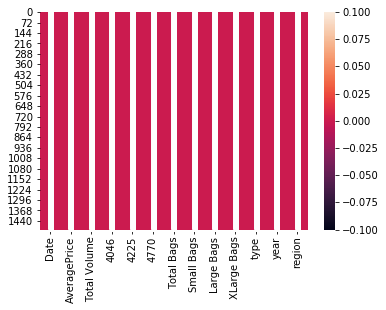

In [77]:
# let's check null values
sns.heatmap(df.isnull(),annot=True)
plt.show()
#No Null Values

In [78]:
# Let's describe the data for better understanding
df.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1500,1500.000000,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000,1500,1500.000000,1500
unique,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,12-04-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500,NaN,74
mean,NaN,1.071533,1.609088e+06,6.506221e+05,6.145873e+05,5.047160e+04,2.934071e+05,2.486180e+05,4.260156e+04,2187.511707,NaN,2015.153333,NaN
std,NaN,0.185364,4.451398e+06,1.957018e+06,1.679916e+06,1.383050e+05,7.586402e+05,6.481144e+05,1.183651e+05,7482.631600,NaN,0.360429,NaN
min,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,0.970000,1.476492e+05,2.013010e+04,4.185570e+04,8.672775e+02,3.587820e+04,2.963462e+04,5.125525e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.080000,4.073439e+05,8.411721e+04,1.243290e+05,7.360670e+03,7.460980e+04,6.301849e+04,4.785235e+03,0.000000,NaN,2015.000000,NaN
75%,NaN,1.190000,9.904908e+05,3.811823e+05,4.868930e+05,3.085165e+04,1.582093e+05,1.468208e+05,3.005311e+04,409.167500,NaN,2015.000000,NaN


In [79]:
# We saw that 'type' has only one value. Lets reconfirm
df['type'].value_counts()

conventional    1500
Name: type, dtype: int64

In [80]:
#Dropping 'type'
df.drop('type',axis=1,inplace=True)

In [81]:
df['region'].value_counts()
# Some of this data is useless as they are direction(North, East, North-Central etc.). 
# Also, there are a few states also, but maximum regions are cities. The prediction of regions will have errors.
# So,Let's remove ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']

California             74
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
DallasFtWorth          17
Roanoke                17
MiamiFtLauderdale      17
Charlotte   

In [82]:
remove=['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 
        'SouthCentral', 'Southeast', 'TotalUS', 'West']
df = df[~df.region.isin(remove)]
#This will remove the states and Directions from the dataset and make it clean

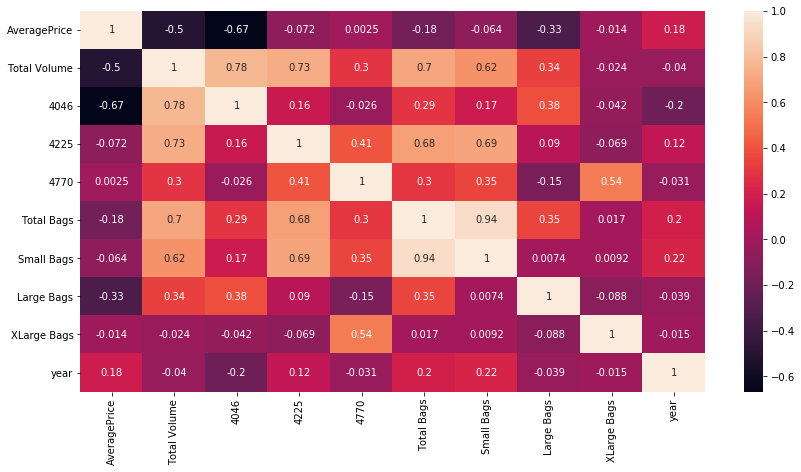

In [83]:
# Let's see how the numerical variables are correlated
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)
plt.show()
# Most of the data features seems to have strong correlations among themselves

In [84]:
# Let's see year wise average price
df.groupby('year')['AveragePrice'].mean()
# Overall Avg price has increased

year
2015.0    1.062517
2016.0    1.156444
Name: AveragePrice, dtype: float64

In [85]:
# It would be a good idea to sort the dataset based on date

df['Date'] =pd.to_datetime(df.Date)
df.sort_values(by=['Date'], inplace=True, ascending=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
755,2015-01-02,1.14,569304.80,30263.22,417993.89,1722.10,119325.59,104365.66,14959.93,0.00,2015.0,Philadelphia
978,2015-01-02,0.91,1352027.64,369580.89,896514.30,20587.92,65344.53,64393.44,832.23,118.86,2015.0,SanFrancisco
475,2015-01-02,0.72,1280364.01,540024.17,597855.73,8063.40,134420.71,86145.18,48275.53,0.00,2015.0,Houston
1265,2015-01-02,0.71,916367.42,611270.39,205181.23,14107.36,85808.44,82065.70,3742.74,0.00,2015.0,WestTexNewMexico
488,2015-01-02,0.92,245352.56,7245.61,181784.28,14761.53,41561.14,20669.59,18130.75,2760.80,2015.0,Indianapolis


In [86]:
df_date = df.groupby('Date').sum().reset_index()
df_date.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,2015-01-02,17.94,11813462.95,5364635.59,4868218.30,204797.10,1375811.96,1061634.25,311241.45,2936.26,38285.0
1,2015-01-03,23.86,9580406.30,4001795.06,3949817.67,252067.34,1376726.23,1129333.53,237167.67,10225.03,46345.0
2,2015-01-11,18.66,5779718.08,1967334.82,2433398.50,275716.11,1103268.65,930352.37,147850.98,25065.30,36270.0
3,2015-01-18,17.57,9408650.07,4726025.82,3229408.74,171137.51,1282078.00,1080360.99,198819.84,2897.17,32240.0
4,2015-01-25,18.17,7651709.97,3632755.22,2750136.69,112256.97,1156561.09,974928.39,181514.55,118.15,34255.0


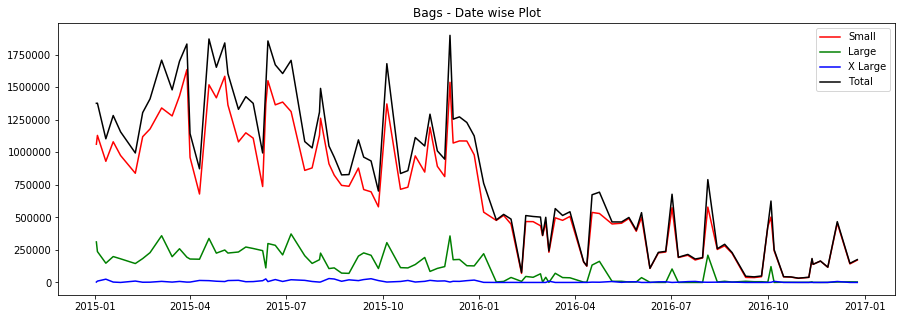

In [87]:
# Plotting All with respect to Date to see bags

plt.figure(figsize=(15, 5))
plt.plot(df_date['Date'], df_date['Small Bags'],color='red',label='Small')
plt.plot(df_date['Date'], df_date['Large Bags'],color='green',label='Large')
plt.plot(df_date['Date'], df_date['XLarge Bags'], color='blue',label='X Large')
plt.plot(df_date['Date'], df_date['Total Bags'], color='black',label='Total')
plt.title('Bags - Date wise Plot')
plt.legend()
plt.show()

# XLarge Bags are the least, Large are little more but maximum are the small bags. Also, the fluctuation is very high in case of small bags

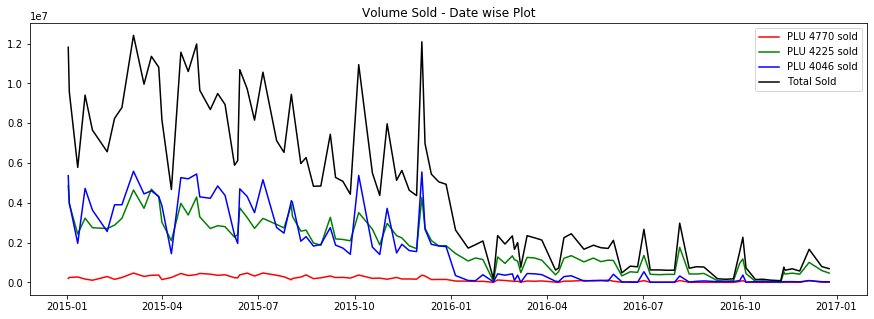

In [88]:
# Plotting All with respect to Date to see bags

plt.figure(figsize=(15, 5))
plt.plot(df_date['Date'], df_date['4770'],color='red',label='PLU 4770 sold')
plt.plot(df_date['Date'], df_date['4225'],color='green',label='PLU 4225 sold')
plt.plot(df_date['Date'], df_date['4046'], color='blue',label='PLU 4046 sold')
plt.plot(df_date['Date'], df_date['Total Volume'], color='black',label='Total Sold')
plt.title('Volume Sold - Date wise Plot')
plt.legend()
plt.show()
# PLU 4770 are the least, PLU 4225 and PLU 4046 are almost equal. 

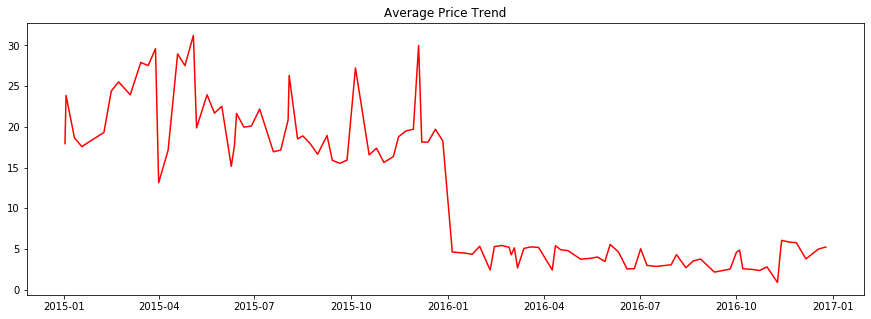

In [89]:
# Plotting Average Price respect to Date

plt.figure(figsize=(15, 5))
plt.plot(df_date['Date'], df_date['AveragePrice'],color='red',label='Avg_Price')
plt.title('Average Price Trend')
plt.show()

In [90]:
# As date format is not suitable for analysis, let's remove Date column
df = df.drop(['Date'], axis = 1)


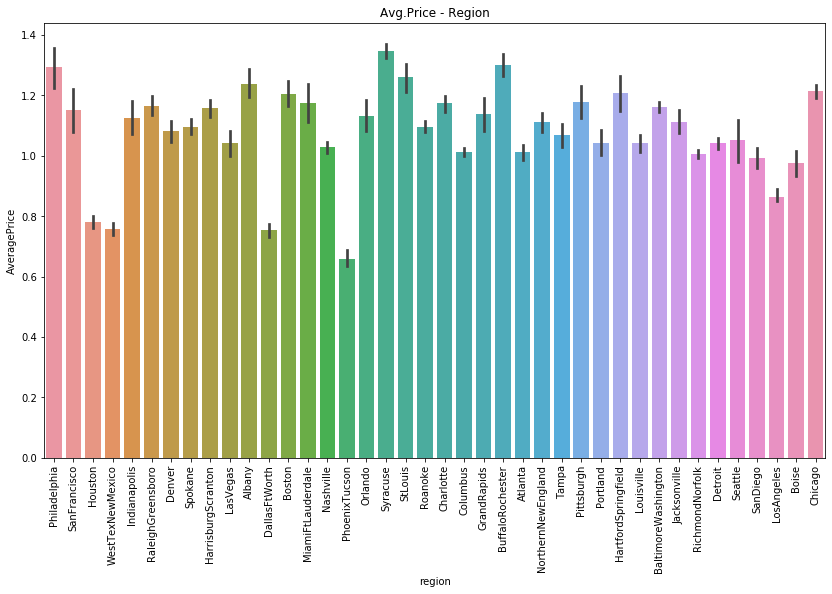

In [91]:
# Let's see the average prices by regions
plt.figure(figsize=(14,8))
plt.title("Avg.Price - Region")
plt.xticks(rotation=90)
sns.barplot(x="region",y="AveragePrice",data= df)

In [92]:
# Total Bags = Small Bags + Large Bags + XLarge Bags. Let's drop Total Bags as it is dependent feature
df = df.drop(['Total Bags'], axis = 1)
# Similarly,let's drop Total Volume column.
df = df.drop(['Total Volume'], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008BDA97CC88>,
      dtype=object)

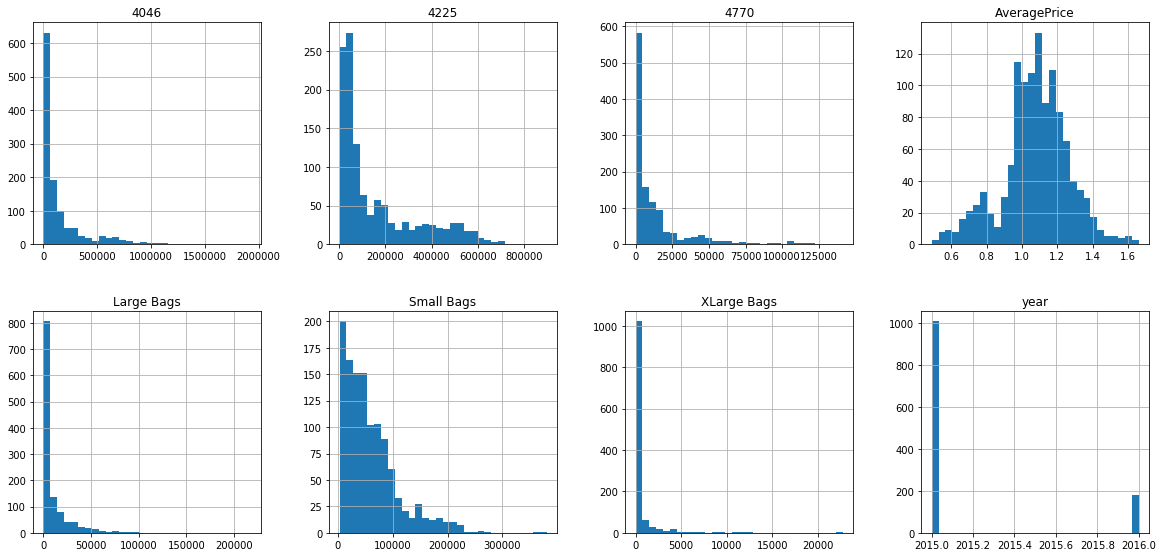

In [93]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [94]:
# Other than AvgPrice, other variables seem to be skewed.
# Let's check for skewness
print(df.skew())
#There is a lot of skewness present in the data. Let's transform them.

AveragePrice   -0.308528
4046            2.723563
4225            1.306909
4770            2.709806
Small Bags      1.682969
Large Bags      4.403752
XLarge Bags     6.527399
year            1.947696
dtype: float64


In [95]:
import numpy as np
for col in df.columns:
    if df[col].dtypes!="object":
        if df.skew().loc[col]>0.55:
            df[col]=np.log1p(df[col])
        
df.skew()
# We have successfully removed a lot of skewness

AveragePrice   -0.308528
4046           -0.471690
4225           -0.333008
4770           -0.502731
Small Bags     -0.304419
Large Bags     -0.969533
XLarge Bags     1.055750
year            1.947696
dtype: float64

In [96]:
df.dtypes
#Let's do Label Encoding for regions

AveragePrice    float64
4046            float64
4225            float64
4770            float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year            float64
region           object
dtype: object

In [97]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [98]:
df.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region
755,1.14,10.317721,12.943224,7.451880,11.555666,9.613197,0.000000,7.608871,25
978,0.91,12.820128,13.706271,9.932508,11.072783,6.725310,4.786324,7.608871,33
475,0.72,13.199371,13.301106,8.995215,11.363801,10.784701,0.000000,7.608871,15
1265,0.71,13.323296,12.231654,9.554523,11.315288,8.227840,0.000000,7.608871,39
488,0.92,8.888289,12.110581,9.599847,9.936467,9.805420,7.923638,7.608871,16


In [99]:
from scipy.stats import zscore
z = abs(zscore(df))
print(df.shape)
df=df[(z<3).all(axis=1)]
print(df.shape)
# Let's trear the outliers if any

(1189, 9)
(1186, 9)


# Part 1: Average Price

In [100]:
# Let's Separate our dataset into Features and target
df_av=df
df_x=df_av.drop(columns=["AveragePrice"])
y=df_av[["AveragePrice"]]

In [101]:
#Lets scale the parameters
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region
0,-0.132434,1.270278,-0.197298,1.014432,0.829104,-0.700721,-0.420223,0.683860
1,1.110285,1.861836,0.870139,0.464656,-0.065050,0.905964,-0.420223,1.322489
2,1.298622,1.547729,0.466813,0.795989,1.191827,-0.700721,-0.420223,-0.114425
3,1.360164,0.718628,0.707488,0.740755,0.400167,-0.700721,-0.420223,1.801460
4,-0.842305,0.624765,0.726992,-0.829072,0.888620,1.959105,-0.420223,-0.034597


In [102]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [103]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

# We need Regression so let's start with
# Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
r_state=maxr2_score(lm,x,y)

max r2 score corresponding to  46  is  0.41717712253975114


# Random Forest Regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 250}

In [106]:
rfr=RandomForestRegressor(n_estimators=250)
r_state=maxr2_score(rfr,x,y)

max r2 score corresponding to  55  is  0.8808402281867941


# KNN Regressor

In [107]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 3}

In [108]:
knr=KNeighborsRegressor(n_neighbors=3)
r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  55  is  0.8511201060099634


# SVR

In [109]:
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [110]:
svr=SVR(kernel="rbf",C=1)
r_state=maxr2_score(svr,x,y) 

max r2 score corresponding to  55  is  0.8172076282595901


# Cross Validation

In [111]:
print("\n\nLinear Regression\n\n")
model_evaluation(lm,x,y)

print("\n\nRandom Forest REGRESSOR\n\n")
model_evaluation(rfr,x,y)

print("\n\nKNN REGRESSOR\n\n")
model_evaluation(knr,x,y)

print("\n\nSVM REGRESSOR\n\n")
model_evaluation(svr,x,y)




Linear Regression


Mean r2 score for regressor:  0.24813904073129717
standard deviation in r2 score for regressor:  0.1799164624637718
[ 0.37657904  0.32784047  0.29886534  0.34555436 -0.10814401]


Random Forest REGRESSOR


Mean r2 score for regressor:  0.6892198272611987
standard deviation in r2 score for regressor:  0.21779829562819544
[0.81872792 0.83358076 0.80787489 0.72582198 0.26009359]


KNN REGRESSOR


Mean r2 score for regressor:  0.6757642034802347
standard deviation in r2 score for regressor:  0.15918000619388253
[0.78480192 0.7924906  0.74075238 0.69574402 0.3650321 ]


SVM REGRESSOR


Mean r2 score for regressor:  0.5773089025901031
standard deviation in r2 score for regressor:  0.3183350392991805
[ 0.74625307  0.75561394  0.75063394  0.69172888 -0.05768532]


# Based on above results let's select Random Forest REGRESSOR

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 55,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [113]:
#Lets find the rmse and r2_score using sklearn.metrics for RFR model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.06898824062503578
r2_score is:  0.878531842351651


In [114]:
from sklearn.externals import joblib
joblib.dump(rfr,'AvgPrice_Avocado.pkl')

['AvgPrice_Avocado.pkl']

# Part 2: Region

In [115]:
# Let's Separate our dataset into Features and target
df_re=df
df_x=df_re.drop(columns=["region"])
y=df_re[["region"]]

In [116]:
#Lets scale the parameters
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year
0,0.334326,-0.132434,1.270278,-0.197298,1.014432,0.829104,-0.700721,-0.420223
1,-0.888487,1.110285,1.861836,0.870139,0.464656,-0.065050,0.905964,-0.420223
2,-1.898637,1.298622,1.547729,0.466813,0.795989,1.191827,-0.700721,-0.420223
3,-1.951803,1.360164,0.718628,0.707488,0.740755,0.400167,-0.700721,-0.420223
4,-0.835321,-0.842305,0.624765,0.726992,-0.829072,0.888620,1.959105,-0.420223


# We need Classification so let's start with
# Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfc=RandomForestClassifier()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfc, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 200}

In [118]:
rfc=RandomForestRegressor(n_estimators=200)
r_state=maxr2_score(rfc,x,y)

max r2 score corresponding to  94  is  0.9397820659747271


# KNN Classifier

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knn, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 2}

In [120]:
knn=KNeighborsRegressor(n_neighbors=2)
r_state=maxr2_score(knn,x,y)

max r2 score corresponding to  77  is  0.971772080384452


# SVC

In [121]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [122]:
svc=SVC(kernel="rbf",C=10)
r_state=maxr2_score(svr,x,y) 

max r2 score corresponding to  58  is  0.5583334070822914


# Cross Validation

In [124]:
print("\n\nRandom Forest Classifier\n\n")
model_evaluation(rfc,x,y)

print("\n\nKNN Classifier\n\n")
model_evaluation(knn,x,y)

print("\n\nSVM Classifier\n\n")
model_evaluation(svc,x,y)



Random Forest Classifier


Mean r2 score for regressor:  0.5255839567231275
standard deviation in r2 score for regressor:  0.6474534213526512
[ 0.85475224  0.86073794  0.88308754  0.79743117 -0.76808911]


KNN Classifier


Mean r2 score for regressor:  0.5666628695136033
standard deviation in r2 score for regressor:  0.687257281377136
[ 0.9183922   0.89262387  0.91102842  0.91898944 -0.80771958]


SVM Classifier


Mean r2 score for regressor:  0.8752672772540773
standard deviation in r2 score for regressor:  0.07068752663338879
[0.75840439 0.86077599 0.95117363 0.85930083 0.94668155]


# Based on above results let's select Support Vector Classifier

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 58,test_size=0.20)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [129]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))

Confusion matrix 
 [[15  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  6]]
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        11
           6       0.67      0.67      0.67         3
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        12
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         2
          11       0.91      1.00      0.95        10
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00 

In [130]:
joblib.dump(svc,'Region.pkl')

['Region.pkl']